In [1]:
import skimage
from skimage import io
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.feature import canny
from skimage.exposure import histogram
from skimage.color import rgb2gray
from scipy import ndimage as ndi
import numpy as np
import cv2
import os

In [2]:
imgPath = r'./boxed_images'
img = r'6fa4ec1d0.jpg'
imgPathPic = os.path.join(imgPath, img)

In [3]:
print(imgPathPic)

./boxed_images/6fa4ec1d0.jpg


In [4]:
img = io.imread(imgPathPic)
img_array = np.array(img)
np.shape(img_array)

(337, 1596, 3)

In [5]:
y_dim = np.shape(img_array[:])
y_dim

(337, 1596, 3)

In [7]:
img_array[1][:]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [17]:
np.shape(img_array[1][1])

(3,)

In [6]:
y = int(y_dim[0]/2)
img_array[y][400]

array([1, 1, 1], dtype=uint8)

In [12]:
i = 0

for current_pixel in img_array[1][52]:
    print(f"count: {i}, current_pixel: {current_pixel}")
    i+=1

count: 0, current_pixel: 255
count: 1, current_pixel: 255
count: 2, current_pixel: 255


In [13]:
np.shape(img_array[1][:])[0]

1596

In [16]:
pos = 0
while pos < np.shape(img_array[1][:])[0]:
    avg = 0
    for i in img_array[y][pos]:
        avg+=i
    avg/=3
    if avg < 24:
        break
    pos+=1

print(pos)

108


In [7]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
lower_blue = np.array([110,50,50]) 
upper_blue = np.array([130,255,255]) 
mask = cv2.inRange(hsv, lower_blue, upper_blue)


In [13]:
res = cv2.bitwise_and(img, img, mask= mask) 
cv2.imshow('img',img) 
cv2.imshow('mask',mask) 
cv2.imshow('res',res) 

Text(0.5, 1.0, 'res')

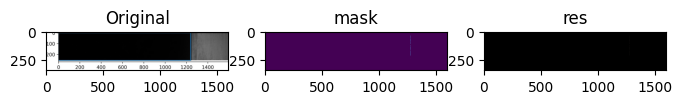

In [14]:
fig, axes = plt.subplots(1,3, figsize=(8,4))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(mask)
ax[1].set_title("mask")
ax[2].imshow(res)
ax[2].set_title("res")

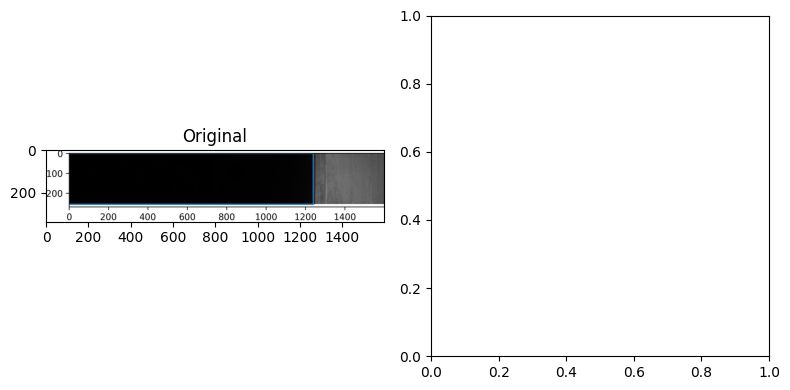

In [15]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title("Original")
# ax[1].imshow(img_gray, cmap=plt.cm.gray)
# ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [8]:
edges = canny(img_gray)

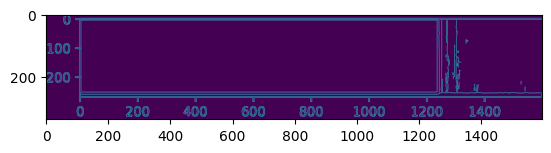

In [9]:
plt.imshow(edges)

(array([252.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.]),
 array([1.00000e+01, 1.34620e+04, 2.69140e+04, 4.03660e+04, 5.38180e+04,
        6.72700e+04, 8.07220e+04, 9.41740e+04, 1.07626e+05, 1.21078e+05,
        1.34530e+05]),
 <BarContainer object of 10 artists>)

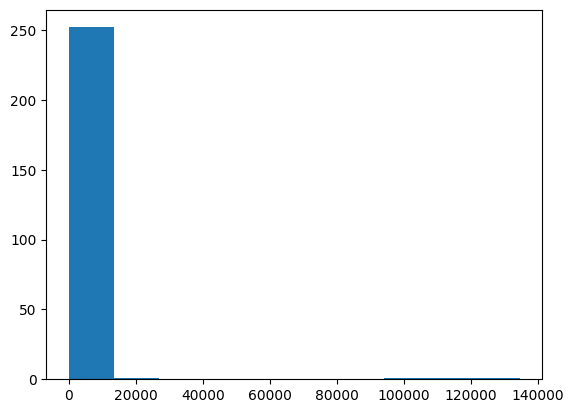

In [10]:
hist, hist_centers = histogram(img_gray)
plt.hist(hist)

In [84]:
# fill_holes = ndi.binary_fill_holes(edges)

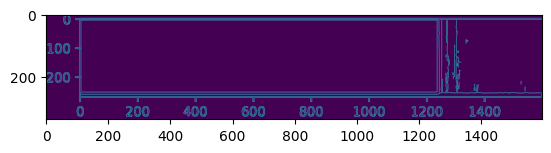

In [11]:
plt.imshow(edges)

In [12]:
markers = np.zeros_like(img_gray)
markers[img_gray < 30] = 1
markers[img_gray > 150] = 2

In [13]:
markers

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])